In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('covid19_italy_region.csv')
data.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [3]:
data.columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [4]:
data.shape

(6027, 17)

In [5]:
print(data.info())
print("$"*50)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SNo                        6027 non-null   int64  
 1   Date                       6027 non-null   object 
 2   Country                    6027 non-null   object 
 3   RegionCode                 6027 non-null   int64  
 4   RegionName                 6027 non-null   object 
 5   Latitude                   6027 non-null   float64
 6   Longitude                  6027 non-null   float64
 7   HospitalizedPatients       6027 non-null   int64  
 8   IntensiveCarePatients      6027 non-null   int64  
 9   TotalHospitalizedPatients  6027 non-null   int64  
 10  HomeConfinement            6027 non-null   int64  
 11  CurrentPositiveCases       6027 non-null   int64  
 12  NewPositiveCases           6027 non-null   int64  
 13  Recovered                  6027 non-null   int64

In [6]:
data.drop(['SNo','Latitude','Longitude'],axis=1,inplace=True)

In [7]:
#Checking null values
data.isnull().sum()

Date                            0
Country                         0
RegionCode                      0
RegionName                      0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

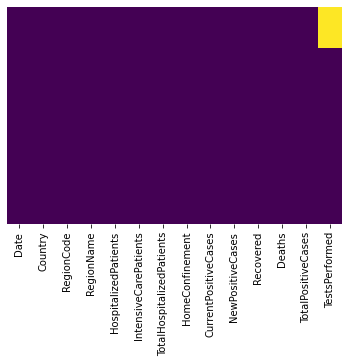

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [9]:
data.TestsPerformed.unique()

array([     nan,   22424.,    6528., ...,  231538.,   34644., 1090932.])

In [10]:
#Filling the missing values
data['TestsPerformed'].fillna(data['TestsPerformed'].mean(),inplace=True)

In [11]:
data.isnull().sum()

Date                         0
Country                      0
RegionCode                   0
RegionName                   0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='TotalPositiveCases', ylabel='Recovered'>

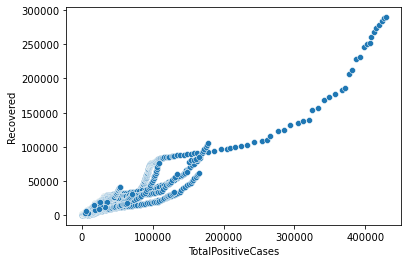

In [12]:
sns.scatterplot(x="TotalPositiveCases",y="Recovered",data=data,palette="deep")

<AxesSubplot:xlabel='TotalPositiveCases', ylabel='Deaths'>

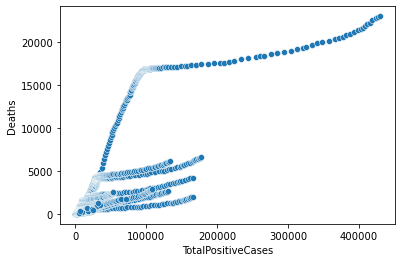

In [13]:
sns.scatterplot(x="TotalPositiveCases",y="Deaths",data=data)

<AxesSubplot:xlabel='TotalPositiveCases', ylabel='NewPositiveCases'>

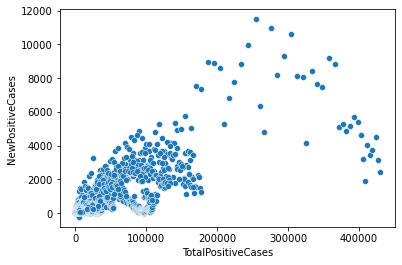

In [14]:
sns.scatterplot(x="TotalPositiveCases",y="NewPositiveCases",data=data)

<AxesSubplot:xlabel='IntensiveCarePatients', ylabel='Deaths'>

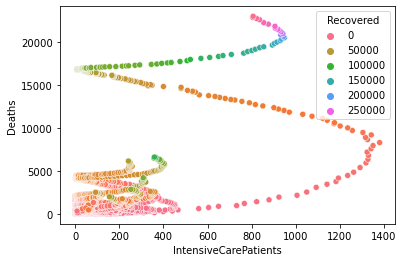

In [15]:
sns.scatterplot(x="IntensiveCarePatients",y="Deaths",hue="Recovered",data=data,palette="husl")

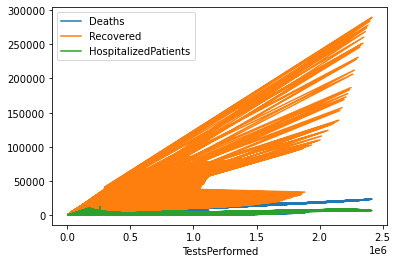

In [16]:
data.plot(x="TestsPerformed",y=["Deaths","Recovered","HospitalizedPatients"])
plt.show();

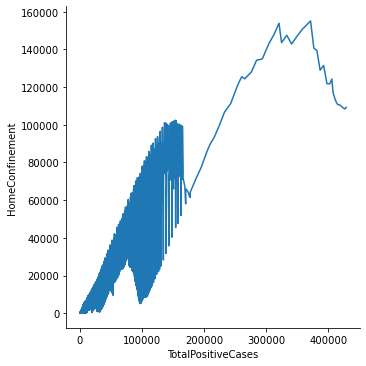

In [17]:
sns.relplot(x='TotalPositiveCases',y='HomeConfinement',kind='line',data=data)

Observations:-
There was a huge increase of cases initially and then slowly cases came down.

Total admited people is directly proportional to number of people recovered

When more people took home quaranine ,mumber of cases reduced